# Challenge 6

In this challenge, we will practice _feature engineering_, one of the most important and laborious processes in ML. We will use the _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), which contains data on the 227 countries of the world with information on population size, area, immigration and production sectors.

> Note: Please do not change the name of the response functions.

## General _Setup_

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

#Packages for questions 2 and 3
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)

#Package for question 4
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Packages for questions 6 and 7
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfVectorizer
)

In [ ]:
# Some settings for matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Notes

This _data set_ still needs some initial adjustments. First, notice that the numeric variables are using commas as decimal separators and are encoded as strings. Correct this before continuing: convert these variables to numerics accordingly.

In addition, the `Country` and `Region` variables have extra spaces at the beginning and end of the string. You can use the `str.strip()` method to remove these spaces.

## Start your analysis from here

In [ ]:
# Your analysis starts here.
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [ ]:
#Generating list with variables that are as string
lista = list(countries.select_dtypes(exclude = ['int64', 'float64']))

#Removing Country and Region from the list
del lista[0:2]

In [ ]:
#Transforming numerical variables
countries[lista] = countries[lista].replace(',', '.', regex = True).astype(float)

In [ ]:
#Removing spaces
countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()

## Question 1

What are the regions (variable `Region`) present in the _data set_? Return a list of the unique regions of the _data set_ with the spaces in front and behind the string removed (but keep punctuation: period, hyphen, etc.) and sorted alphabetically.

In [9]:
def q1():
    regioes_unicas = pd.Series(countries['Region'].unique())
    return list(regioes_unicas.sort_values(ascending = True))

## Question 2

Discretizing the `Pop_density` variable into 10 intervals with `KBinsDiscretizer`, following the `ordinal` encode and `quantile` strategy, how many countries are above the 90th percentile? Answer as a single integer scalar.

In [ ]:
def q2():
    #Transforming the dataset with KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins = 10, encode = "ordinal", strategy = "quantile")
    pop_density_bins = discretizer.fit_transform(countries[['Pop_density']])
    
    #Returning number of countries above 9th percentile
    return int(sum(pop_density_bins >= 9)[0])

## Question 3

If we encode the variables `Region` and `Climate` using _one-hot encoding_, how many new attributes would be created? Answer as a single scalar.

In [ ]:
def q3():
    #Transforming the dataset with one-hot encoding
    one_hot_encoder = OneHotEncoder(sparse=False, dtype = np.int)
    region_climate_encoded = one_hot_encoder.fit_transform(countries[['Region', 'Climate']].fillna('').astype('str'))
    
    #Returning the amount of new attributes created
    return region_climate_encoded.shape[1]

## Question 4

Apply the following _pipeline_:

1. Fill the variables of type `int64` and `float64` with their respective medians.
2. Standardize these variables.

After applying the _pipeline_ described above to the data (only to the variables of the specified types), apply the same _pipeline_ (or `ColumnTransformer`) to the data below. What is the value of the variable `Arable` after the _pipeline_? Answer as a single float rounded to three decimal places.

In [ ]:
#Creating the pipeline
mediana_pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('standard_scaler', StandardScaler())
])

In [ ]:
#Selecting numeric variables from DF countries
variaveis_num = countries.select_dtypes(include = np.number)

In [ ]:
#Applying the pipeline to data
pipeline_transformation_1 = mediana_pipeline.fit_transform(variaveis_num)

In [ ]:
#Result
pipeline_transformation_1[:5]

array([[ 0.01969468,  0.02758332, -0.19984434, -0.29344342,  4.75079803,
         3.6380982 , -0.89639423, -2.49781686, -1.02749132, -0.12636082,
        -0.51886111,  0.37260169, -1.69435818,  2.21296666,  2.2525074 ,
         1.63657562, -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, -0.27597435, -1.02509671,
        -0.39284992, -0.51671798,  0.15193269, -0.72607882,  0.56511516,
        -0.01360389, -0.44793341,  1.31636046, -0.62798617, -0.8093326 ,
         0.59516349, -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, -0.29288885, -0.08824204,
        -0.12288603, -0.36684578, -0.71382707, -0.69549432, -0.81397811,
        -0.51525213,  0.92627582, -1.69435818, -0.4448444 , -0.93285921,
        -0.32662697,  2.39091078, -1.67396905],
       [-0.24383369, -0.33477937, -0.05351391,  0.5147092 , -4.28138891,
        -0.74169566, -0.16701618,  0.70287071,  0.10856786, -0.29074071,
         1.25916309, -0.41613456, -0.18899886,  0.035

In [16]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [ ]:
def q4():
    #Organizing the data
    df_test_country = pd.DataFrame([test_country], columns = countries.columns)
    
    #Selecting numeric columns
    test_country_var_num = df_test_country.select_dtypes(include = np.number)
    
    #Applying the pipeline to data
    pipeline_transformation_2 = mediana_pipeline.transform(test_country_var_num)
    
    #Returning the value of the Arable variable after the pipeline
    return float(round(pipeline_transformation_2[0][9], 3))

## Question 5

Find the number of _outliers_ of the variable `Net_migration` according to the _boxplot_ method, that is, using the logic:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ is outlier}$$

that are in the lower group and in the upper group.

Should you remove from the analysis the observations considered _outliers_ according to this method? Answer as a tuple of three elements `(outliers_below, outliers_above, would you remove?)` ((int, int, bool)).

In [ ]:
#Organizing data
net_migration = countries['Net_migration']

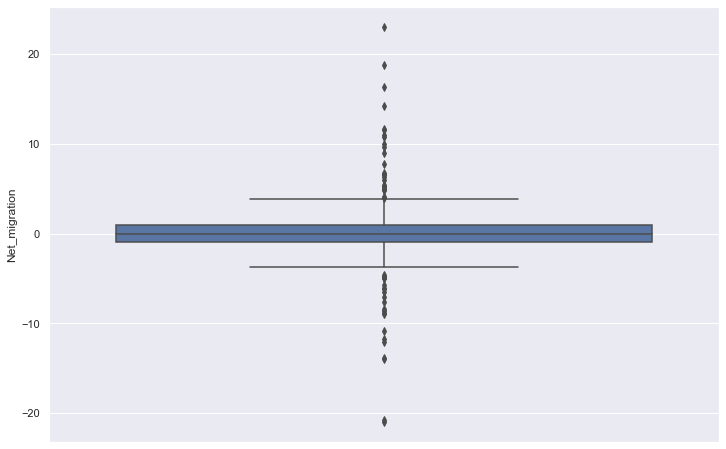

In [19]:
sns.boxplot(net_migration, orient = "vertical");

In [20]:
quartil_1 = net_migration.quantile(0.25)
quartil_3 = net_migration.quantile(0.75)

iqr = (quartil_3 - quartil_1)

lower_range = (quartil_1 - (1.5 * iqr))
upper_range = (quartil_3 + (1.5 * iqr))

todos_outliers = net_migration[(net_migration < lower_range) | (net_migration > upper_range)]

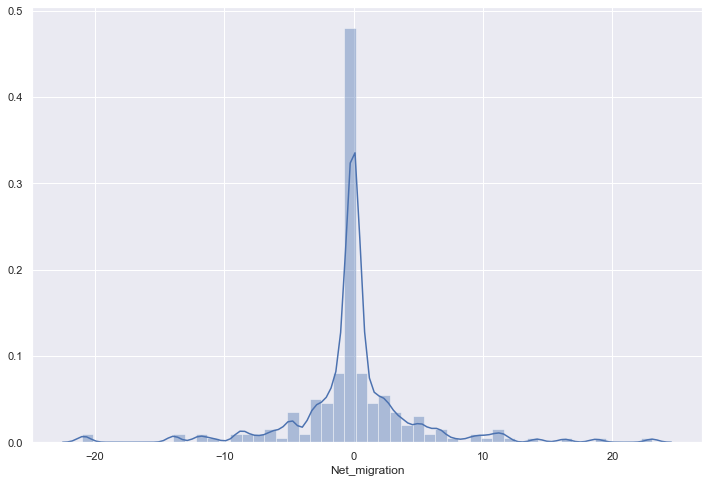

In [ ]:
#Histogram of the variable with outliers
sns.distplot(net_migration.fillna(0));

In [22]:
net_migration_sem_outliers = net_migration.drop(index = todos_outliers.index)

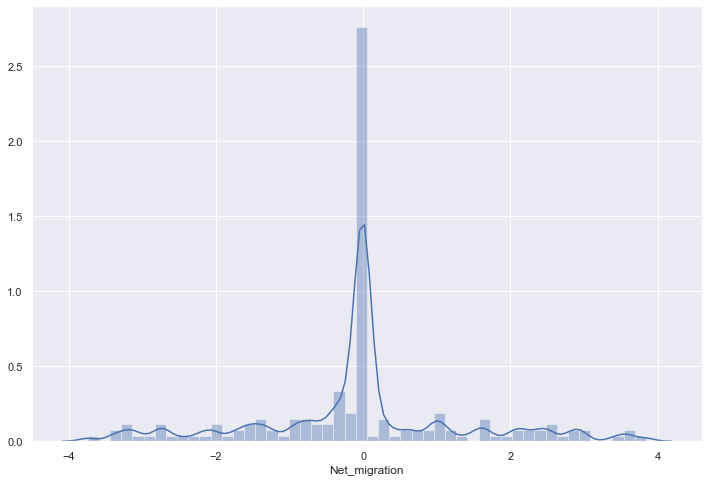

In [ ]:
#Histogram of the variable without outliers
sns.distplot(net_migration_sem_outliers.fillna(0));

In [24]:
net_migration.describe()

count    224.000000
mean       0.038125
std        4.889269
min      -20.990000
25%       -0.927500
50%        0.000000
75%        0.997500
max       23.060000
Name: Net_migration, dtype: float64

In [25]:
net_migration_sem_outliers.describe()

count    174.000000
mean      -0.047874
std        1.425608
min       -3.740000
25%       -0.440000
50%        0.000000
75%        0.150000
max        3.840000
Name: Net_migration, dtype: float64

In [ ]:
def q5():
    #Calculating first and third quartile
    quartil_1 = net_migration.quantile(0.25)
    quartil_3 = net_migration.quantile(0.75)
    
    #Calculating interquartile range
    iqr = (quartil_3 - quartil_1)
    
    #Calculating minimum and maximum values
    lower_range = (quartil_1 - (1.5 * iqr))
    upper_range = (quartil_3 + (1.5 * iqr))
    
    #Number of outliers
    outliers_abaixo = len(net_migration[(net_migration < lower_range)])
    outliers_acima = len(net_migration[(net_migration > upper_range)])
    
    #I wouldn't remove it, because from the graphs above and the describe() data the outliers are significant
    return tuple((outliers_abaixo, outliers_acima, False))

## Question 6
For questions 6 and 7, use the `fetch_20newsgroups` library from the `sklearn` test dataset

Consider loading the following categories and the `newsgroups` dataset:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```

Apply `CountVectorizer` to the `newsgroups` data set and find the number of times the word _phone_ appears in the corpus. Answer as a single scalar.

In [27]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

newsgroups = fetch_20newsgroups(subset = "train", categories = categories, shuffle = True, random_state = 42)

In [ ]:
def q6():
    #Transforming the dataset with CountVectorizer
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)

    #Index of the word phone
    word_phone_idx = count_vectorizer.vocabulary_.get('phone')
    
    #Number of times the word phone appears in the corpus
    return int(newsgroups_counts[:, word_phone_idx].sum())

## Question 7

Apply `TfidfVectorizer` to the _data set_ `newsgroups` and find the TF-IDF of the word _phone_. Answer as a single scalar rounded to three decimal places.

In [ ]:
def q7():
    #Transforming the dataset with TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(newsgroups.data)
    newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroups.data)
    
    ##Index of the word phone
    word_phone_idx = tfidf_vectorizer.vocabulary_.get('phone')
    
    #TF-IDF of the word phone
    return float(round((newsgroups_tfidf_vectorized[:, word_phone_idx].sum()), 3))